# Part I: Recurrent neural network (60%) 

#  Business question
Given the daily power requirement of a household for the past 30 days, what is the expected household power usage for the next day?

Data Background:

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption (with a one-minute sampling rate) for a single household over four years

The data contains 2,075,259 observations and 8 features (including timestamp) collected from a house in France between December 2006 and November 2010


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   global_active_power    object 
 1   global_reactive_power  object 
 2   voltage                object 
 3   global_intensity       object 
 4   sub_metering_1         object 
 5   sub_metering_2         object 
 6   sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


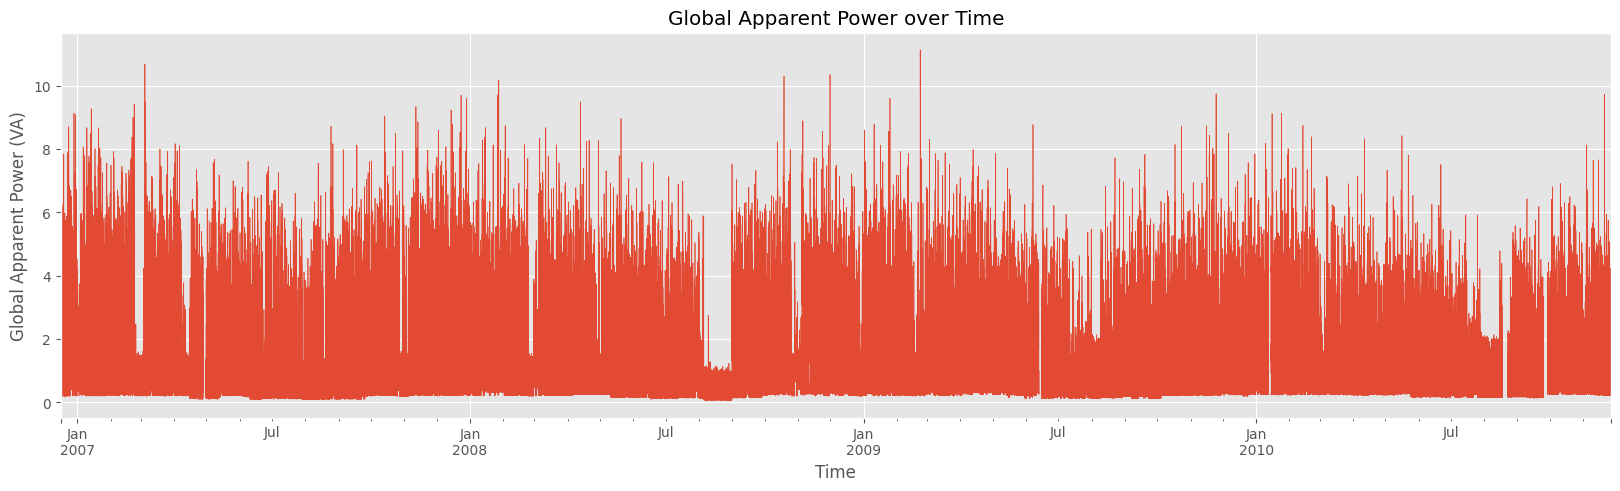

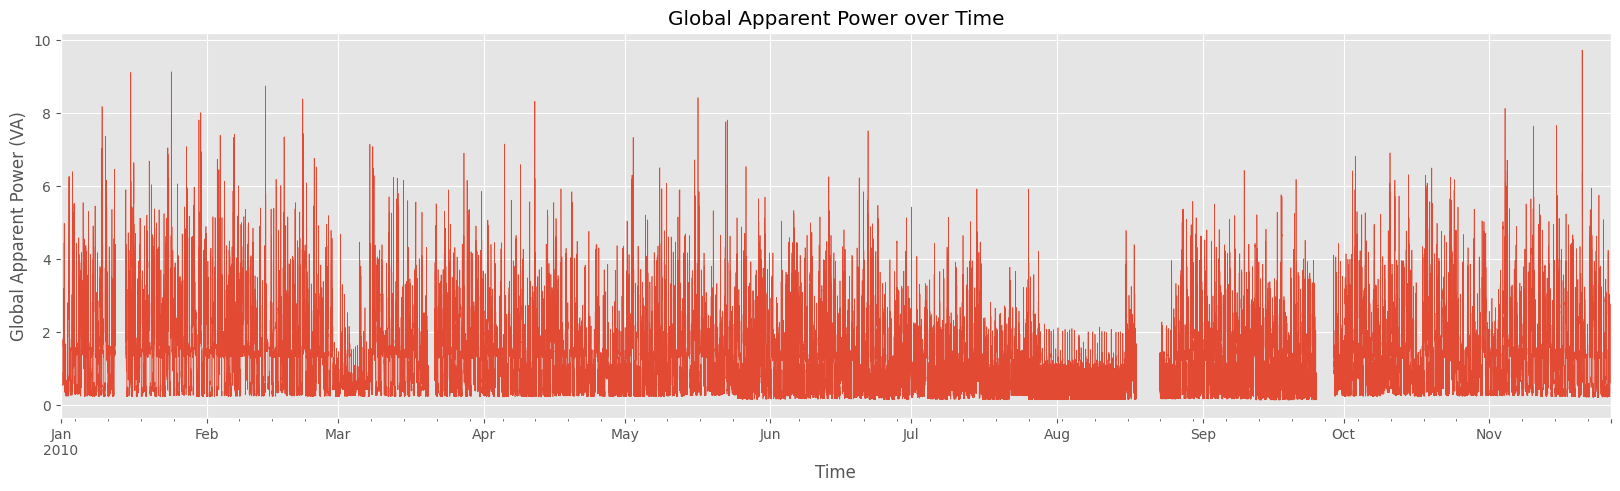

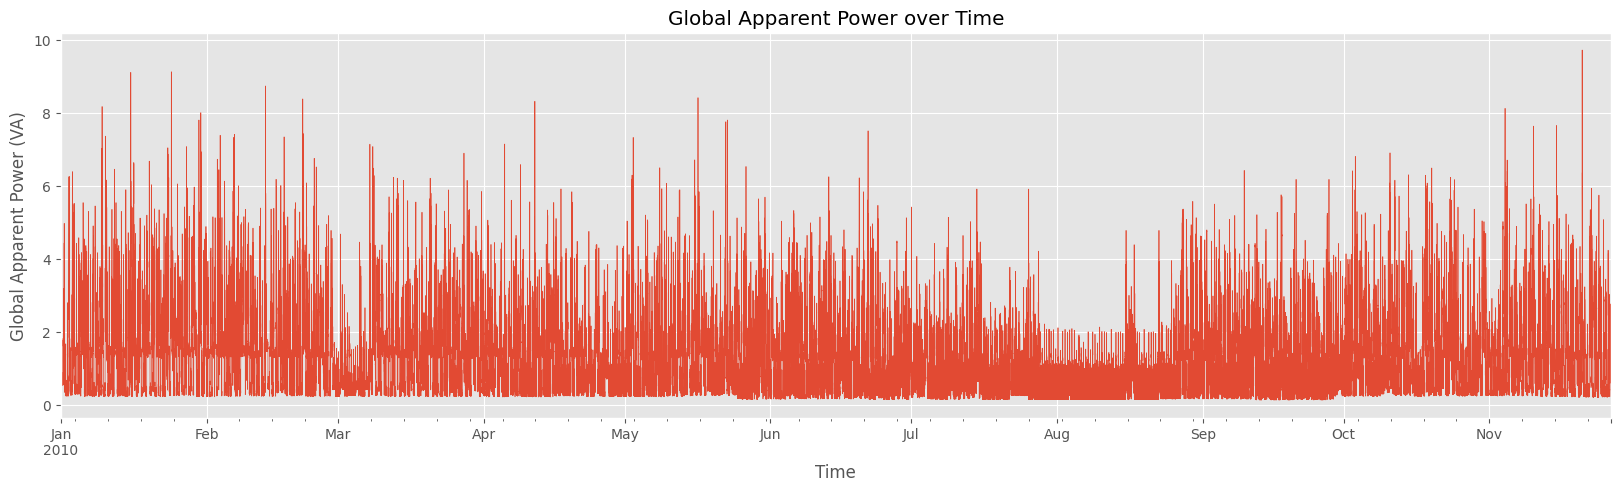

(1442, 1)
(1442, 4)


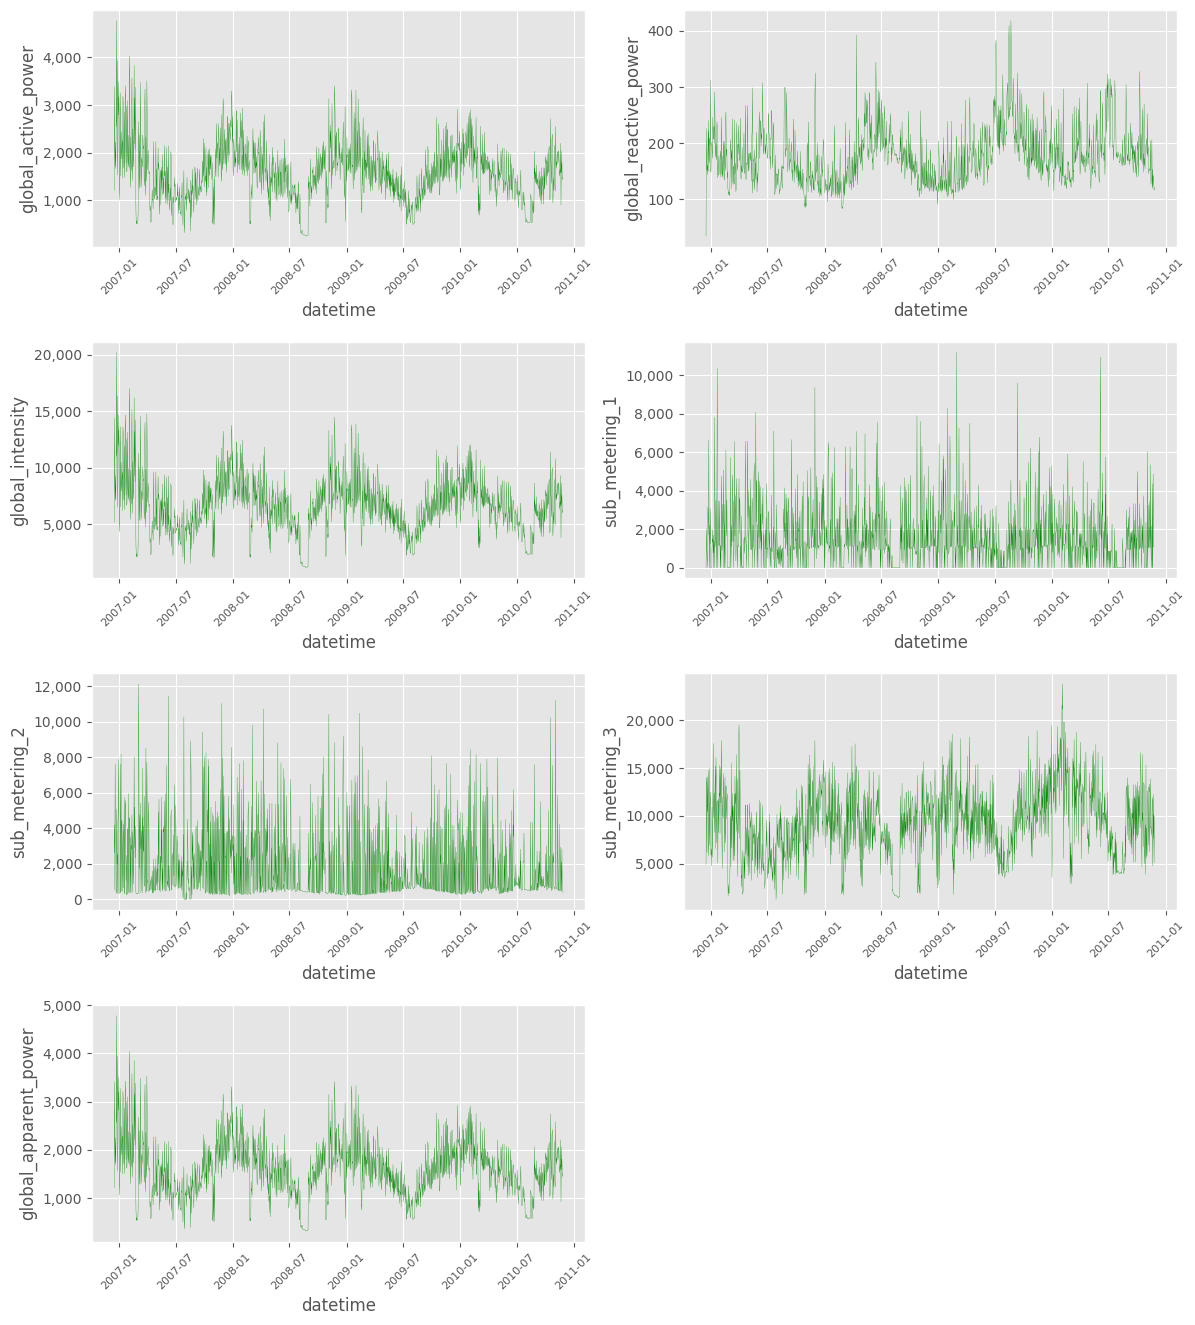

Shape train: (1154, 1) 
Shape test: (288, 1) 

[[0.20115306]
 [0.69214285]
 [0.42734569]
 [0.30746361]
 [0.43176138]]


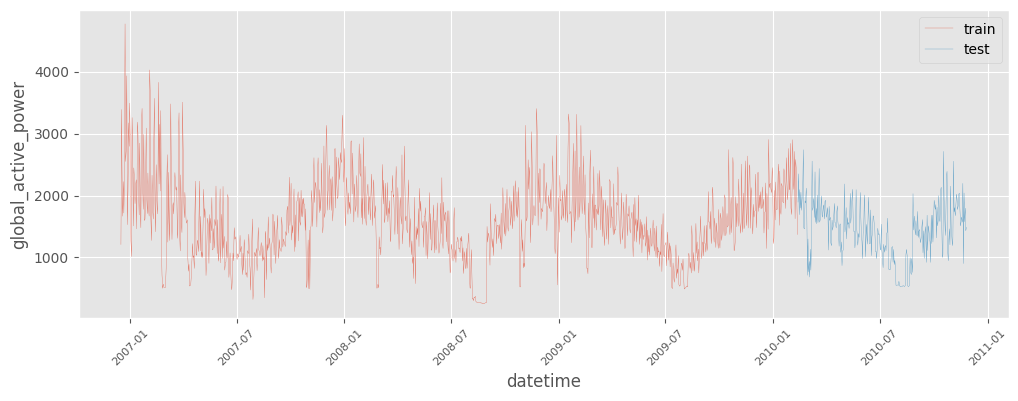

Shape X_train y_train: (1124, 30, 1) (1124, 1, 1) 
Shape X_test y_test: (258, 30, 1) (258, 1, 1) 

[[0.20115306]
 [0.69214285]
 [0.42734569]
 [0.30746361]
 [0.43176138]
 [0.31809196]
 [0.45908132]
 [1.        ]
 [0.50336003]
 [0.54833449]
 [0.8116036 ]
 [0.27846496]
 [0.40090121]
 [0.64428963]
 [0.56291177]
 [0.71431502]
 [0.54798001]
 [0.22020692]
 [0.16589837]
 [0.66238319]
 [0.54070978]
 [0.27388842]
 [0.48553026]
 [0.43600317]
 [0.35477038]
 [0.4194941 ]
 [0.44154238]
 [0.26478311]
 [0.64935748]
 [0.60823592]] [[0.41452429]]


In [2]:
%run loading_cleaning_datagen.ipynb

# LSTM tanh

In [3]:
# Create model
clear_session()

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model = Sequential()
model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


In [4]:
%%time

from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint filepath
filepath = "lstm_power_checkpoint.h5"

# Define checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Fit model
epochs = 100
verbose = 1

history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=16,
                    validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 0.0171 - mae: 0.0999
Epoch 1: val_loss improved from inf to 0.00846, saving model to lstm_power_checkpoint.h5
62/62 [==============================] - 17s 111ms/step - loss: 0.0171 - mae: 0.0999 - val_loss: 0.0085 - val_mae: 0.0688
Epoch 2/5
62/62 [==============================] - ETA: 0s - loss: 0.0142 - mae: 0.0896
Epoch 2: val_loss did not improve from 0.00846
62/62 [==============================] - 4s 71ms/step - loss: 0.0142 - mae: 0.0896 - val_loss: 0.0091 - val_mae: 0.0715
Epoch 3/5
62/62 [==============================] - ETA: 0s - loss: 0.0129 - mae: 0.0841
Epoch 3: val_loss improved from 0.00846 to 0.00801, saving model to lstm_power_checkpoint.h5
62/62 [==============================] - 5s 83ms/step - loss: 0.0129 - mae: 0.0841 - val_loss: 0.0080 - val_mae: 0.0675
Epoch 4/5
62/62 [==============================] - ETA: 0s - loss: 0.0133 - mae: 0.0854
Epoch 4: val_loss improved from 0.00801 to 0.00794, savin

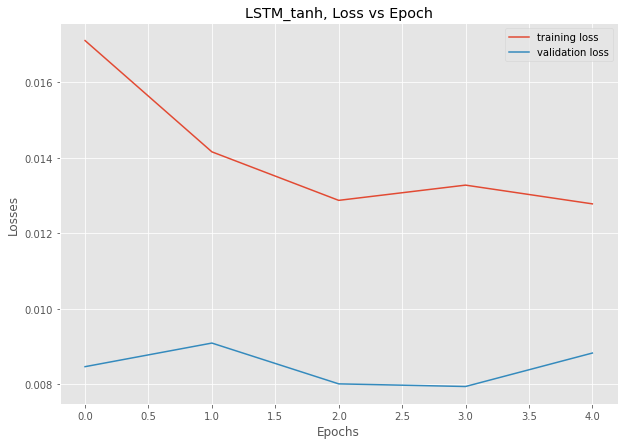

<Figure size 432x288 with 0 Axes>

In [5]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"], label='training loss')
plt.plot(history.history["val_loss"], label='validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM_tanh, Loss vs Epoch")
# plt.ylim([0.006, 0.02])
plt.show()
plt.savefig('LSTM_tanh_loss_vs_epoch')

# LSTM relu

In [7]:
# Create model
clear_session()

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model2 = Sequential()
model2.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model2.add(LSTM(64, activation='relu', return_sequences=True))
model2.add(LSTM(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(n_output))
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time

from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint filepath
filepath = "lstm_relu_power_checkpoint.h5"

# Define checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Fit model
epochs = 100
verbose = 1

history2 = model2.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=16,
                    validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.0236 - mae: 0.1186
Epoch 1: val_loss improved from inf to 0.00869, saving model to lstm_relu_power_checkpoint.h5
62/62 [==============================] - 13s 108ms/step - loss: 0.0236 - mae: 0.1186 - val_loss: 0.0087 - val_mae: 0.0696
Epoch 2/100
61/62 [============================>.] - ETA: 0s - loss: 0.0158 - mae: 0.0954
Epoch 2: val_loss did not improve from 0.00869
62/62 [==============================] - 5s 83ms/step - loss: 0.0157 - mae: 0.0953 - val_loss: 0.0113 - val_mae: 0.0825
Epoch 3/100
61/62 [============================>.] - ETA: 0s - loss: 0.0150 - mae: 0.0926
Epoch 3: val_loss improved from 0.00869 to 0.00822, saving model to lstm_relu_power_checkpoint.h5
62/62 [==============================] - 4s 64ms/step - loss: 0.0153 - mae: 0.0933 - val_loss: 0.0082 - val_mae: 0.0688
Epoch 4/100
61/62 [============================>.] - ETA: 0s - loss: 0.0151 - mae: 0.0919
Epoch 4: val_loss improved from 0.00822

KeyboardInterrupt: 

In [9]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history2.history["loss"], label='training loss')
plt.plot(history2.history["val_loss"], label='validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM_relu, Loss vs Epoch")
# plt.ylim([0.006, 0.02])
plt.show()
plt.savefig('LSTM_relu_loss_vs_epoch')

NameError: name 'history2' is not defined

<Figure size 720x504 with 0 Axes>